In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df=pd.read_csv('/content/sample_data/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
df.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [15]:
df.duplicated().sum()

3

In [16]:
df.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
145,False
146,False
147,False
148,False


<Axes: >

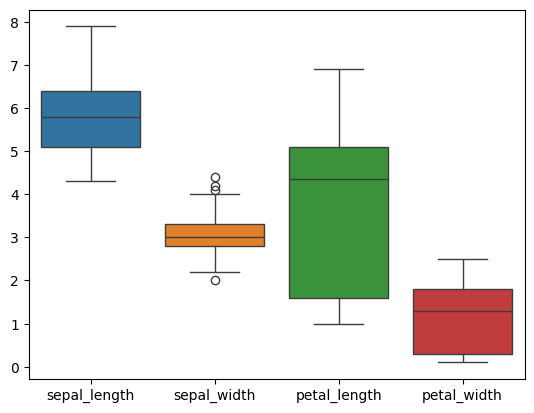

In [21]:
sns.boxplot(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

<Axes: xlabel='sepal_width', ylabel='Density'>

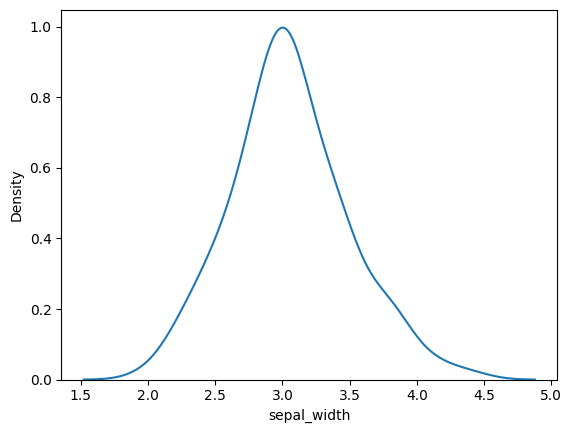

In [22]:
sns.kdeplot(df['sepal_width'])

In [23]:
from scipy.stats import mstats
limits=(0.05, 0.05)
df['sepal_width'] = mstats.winsorize(df['sepal_width'], limits=limits)


<Axes: ylabel='sepal_width'>

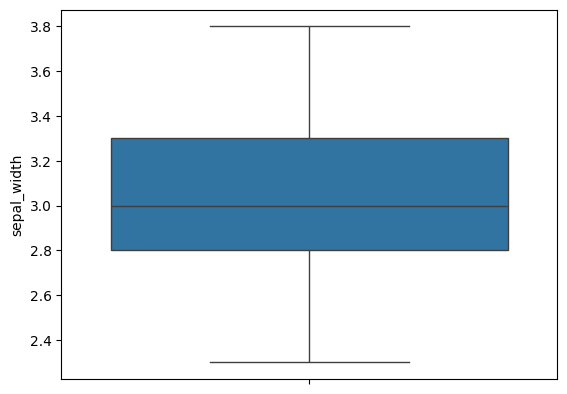

In [24]:
sns.boxplot(df['sepal_width'])

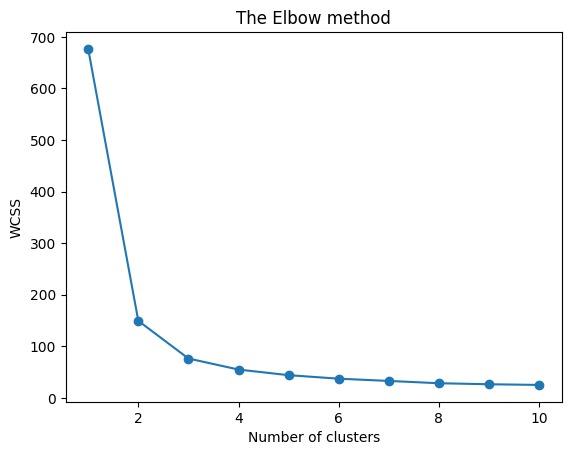

In [29]:
x=df.iloc[:, [0,1,2,3]].values

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init = 'k-means++',
                  max_iter=300, n_init='auto', random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

if len(wcss) == 10:
  plt.plot(range(1, 11), wcss, marker='o')
  plt.title('The Elbow method')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  plt.show()



In [32]:
kmeans=KMeans(n_clusters=3, init='k-means++',
              max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(x)

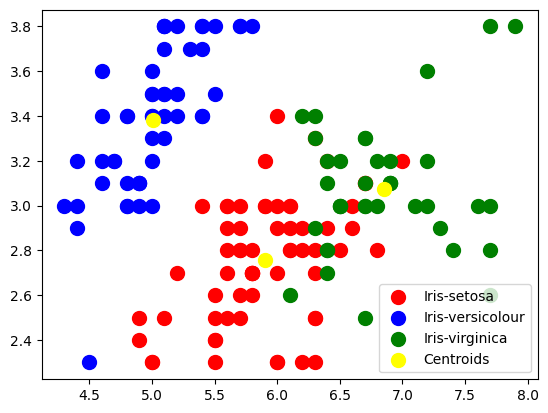

In [33]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='blue', label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='green', label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s=100, c='yellow', label='Centroids')
plt.legend()